# How old is the average Male Javelin Thrower?

### Purpose: Perform EDA on the top 500 Men's Javelin Throwers in the World as of May 9th 2023 in order to extract meaningful descriptive statistics and visualizations of the distribution of ages among these athletes

In [1]:
# Data collection (scraping)
import requests
from bs4 import BeautifulSoup as soup
from splinter import Browser

# ChromeDriverManager
from webdriver_manager.chrome import ChromeDriverManager
# executable_path = {'executable_path': ChromeDriverManager().install()}
# browser = Browser('chrome', **executable_path, headless=False)

# Data manipulation
import pandas as pd
from datetime import datetime
import numpy as np

# Data analysis
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.interpolate import make_interp_spline

In [2]:
# Import pingouin for additional statistical analysis
import pingouin as pg
from pingouin import pairwise_ttests

In [3]:
# Import dataframe_image to export df as png
#!pip install dataframe_image
import dataframe_image as dfi

### Collect Data

In [4]:
# # Launch Chrome Browser
# executable_path = {'executable_path': ChromeDriverManager().install()}
# browser = Browser('chrome', **executable_path, headless=False)

# ### Collect data from worldathletics.org

# men_url = 'https://worldathletics.org/world-rankings/javelin-throw/men?regionType=world&page=1&rankDate=2023-05-09&limitByCountry=0'
# browser.visit(men_url)

# pages = []
# for i in range(1,6):
#     tables = pd.read_html(f'https://worldathletics.org/world-rankings/javelin-throw/men?regionType=world&page={i}&rankDate=2023-05-09&limitByCountry=0')
#     pages.append(tables)

# frame = pd.DataFrame()
# for page in pages:
#     frame = pd.concat([frame,page[0]],axis=0)

# frame.head(5)

# ### Write dataframe to csv

# frame.to_csv('men_javelin_rankings.csv', index=False)

### Read csv file for efficiency upon revisiting analyses

In [5]:
data = pd.read_csv('men_javelin_rankings.csv')
df = pd.DataFrame(data)

### Calculate age with datetime and DOB variable

In [6]:
# Inspect df
df

,Place,Competitor,DOB,Nat,Score,Event List
0,1,Anderson PETERS,21 OCT 1997,GRN,1461,Javelin Throw
1,2,Neeraj CHOPRA,24 DEC 1997,IND,1455,Javelin Throw
2,3,Jakub VADLEJCH,10 OCT 1990,CZE,1428,Javelin Throw
3,4,Julian WEBER,29 AUG 1994,GER,1385,Javelin Throw
4,5,Arshad NADEEM,02 JAN 1997,PAK,1306,Javelin Throw
...,...,...,...,...,...,...
495,496,Tomonori MORISAWA,14 DEC 2005,JPN,826,Javelin Throw
496,497,Thibaud DUTREY,13 FEB 2000,FRA,826,Javelin Throw
497,498,Kazuhisa MATSUSHIMA,27 FEB 2001,JPN,826,Javelin Throw
498,499,Shota KOMATSU,11 OCT 2002,JPN,826,Javelin Throw


In [7]:
# Inspect DOB in isolation
df.DOB

0      21 OCT 1997
1      24 DEC 1997
2      10 OCT 1990
3      29 AUG 1994
4      02 JAN 1997
          ...     
495    14 DEC 2005
496    13 FEB 2000
497    27 FEB 2001
498    11 OCT 2002
499    06 JAN 2004
Name: DOB, Length: 500, dtype: object

In [8]:
# Define function to calculate current age
def calculate_age(dob):
    """
    Calculates the age based on the date of birth.
    """
    try:
        dob_date = datetime.strptime(str(dob), '%d %b %Y')
        today_date = datetime.today()
        age = today_date.year - dob_date.year - ((today_date.month, today_date.day) < (dob_date.month, dob_date.day))
        return age
    except:
        return np.nan

In [9]:
# Add a new column with the age calculated for each row
df['Age'] = df['DOB'].apply(calculate_age)
df['Age'] = df['Age'].fillna(0)

In [10]:
df.head(5)

,Place,Competitor,DOB,Nat,Score,Event List,Age
0,1,Anderson PETERS,21 OCT 1997,GRN,1461,Javelin Throw,25.0
1,2,Neeraj CHOPRA,24 DEC 1997,IND,1455,Javelin Throw,25.0
2,3,Jakub VADLEJCH,10 OCT 1990,CZE,1428,Javelin Throw,32.0
3,4,Julian WEBER,29 AUG 1994,GER,1385,Javelin Throw,28.0
4,5,Arshad NADEEM,02 JAN 1997,PAK,1306,Javelin Throw,26.0


## Plot & Analyze Age

<AxesSubplot:ylabel='Frequency'>

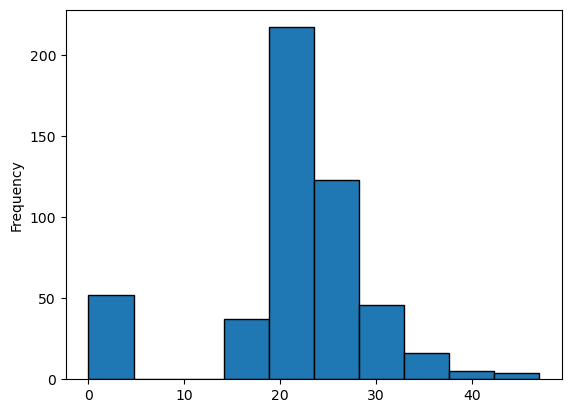

In [11]:
df.Age.plot.hist(edgecolor='black')

In [12]:
# Filter out anomolies < 15 yrs old
df = df[df.Age >= 15]
df.shape

(448, 7)

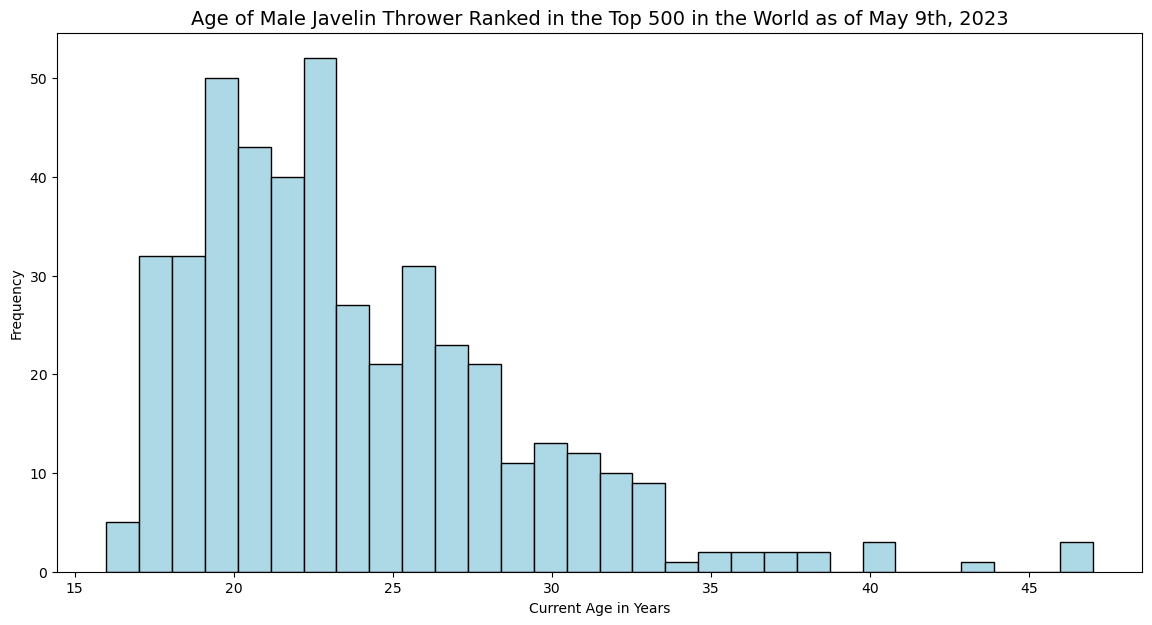

In [13]:
df.Age.plot.hist(bins=30, color='lightblue', edgecolor='black', figsize=[14,7])
plt.title("Age of Male Javelin Thrower Ranked in the Top 500 in the World as of May 9th, 2023", size = 14)
plt.xlabel("Current Age in Years")
plt.show()

In [14]:
df.Age.describe()

count    448.000000
mean      24.017857
std        4.960663
min       16.000000
25%       20.000000
50%       23.000000
75%       27.000000
max       47.000000
Name: Age, dtype: float64

In [15]:
# top_hundred =  df[df.Place <= 100]
# top_hundred.Age.plot.hist(bins=22, color='teal', edgecolor='black', figsize=[16,8])
# plt.title("Histogram of the Age of the Top 100 Male Javelin Throwers in the World Today", size=15)
# plt.xlabel("Current Athlete Age", size=15)
# plt.ylabel("Frequency")
# plt.annotate("Source: https://worldathletics.org/world-rankings/javelin-throw/men?regionType=world&page=1&rankDate=2023-05-09&limitByCountry=0",
#             xy = (.785, -0.15),
#             xycoords='axes fraction',
#             ha='right',
#             va="center",
#             fontsize=10)
# plt.savefig("top_100_age_histogram.png")
# plt.show()

In [16]:
# top_hundred.Age.describe()

In [17]:
# top_fifty =  df[df.Place <= 50]
# top_fifty.Age.plot.hist(bins=22, color='purple', edgecolor='black', figsize=[16,8])
# plt.title("Histogram of the Age of the Top 50 Male Javelin Throwers in the World Today", size=15)
# plt.xlabel("Current Athlete Age", size=15)
# plt.ylabel("Frequency")
# plt.annotate("Source: https://worldathletics.org/world-rankings/javelin-throw/men?regionType=world&page=1&rankDate=2023-05-09&limitByCountry=0",
#             xy = (.785, -0.15),
#             xycoords='axes fraction',
#             ha='right',
#             va="center",
#             fontsize=10)
# plt.savefig("top_50_age_histogram.png")
# plt.show()

### Bin throwers based on world ranking (N bins = 5) model = linear

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
bins = [0, 100, 200, 300, 400, 500]
class_names = ["1st Class", "2nd Class", "3rd Class", "4th Class", "5th Class"]

In [20]:
df["Thrower Class"] = pd.cut(df["Place"], bins, labels=class_names, include_lowest=True)
df

,Place,Competitor,DOB,Nat,Score,Event List,Age,Thrower Class
0,1,Anderson PETERS,21 OCT 1997,GRN,1461,Javelin Throw,25.0,1st Class
1,2,Neeraj CHOPRA,24 DEC 1997,IND,1455,Javelin Throw,25.0,1st Class
2,3,Jakub VADLEJCH,10 OCT 1990,CZE,1428,Javelin Throw,32.0,1st Class
3,4,Julian WEBER,29 AUG 1994,GER,1385,Javelin Throw,28.0,1st Class
4,5,Arshad NADEEM,02 JAN 1997,PAK,1306,Javelin Throw,26.0,1st Class
...,...,...,...,...,...,...,...,...
495,496,Tomonori MORISAWA,14 DEC 2005,JPN,826,Javelin Throw,17.0,5th Class
496,497,Thibaud DUTREY,13 FEB 2000,FRA,826,Javelin Throw,23.0,5th Class
497,498,Kazuhisa MATSUSHIMA,27 FEB 2001,JPN,826,Javelin Throw,22.0,5th Class
498,499,Shota KOMATSU,11 OCT 2002,JPN,826,Javelin Throw,20.0,5th Class


### Plot Histogram of Age Overlaying Thrower Classes

In [21]:
data1 = df[df["Thrower Class"] == "1st Class"].Age
data2 = df[df["Thrower Class"] == "2nd Class"].Age
data3 = df[df["Thrower Class"] == "3rd Class"].Age
data4 = df[df["Thrower Class"] == "4th Class"].Age
data5 = df[df["Thrower Class"] == "5th Class"].Age

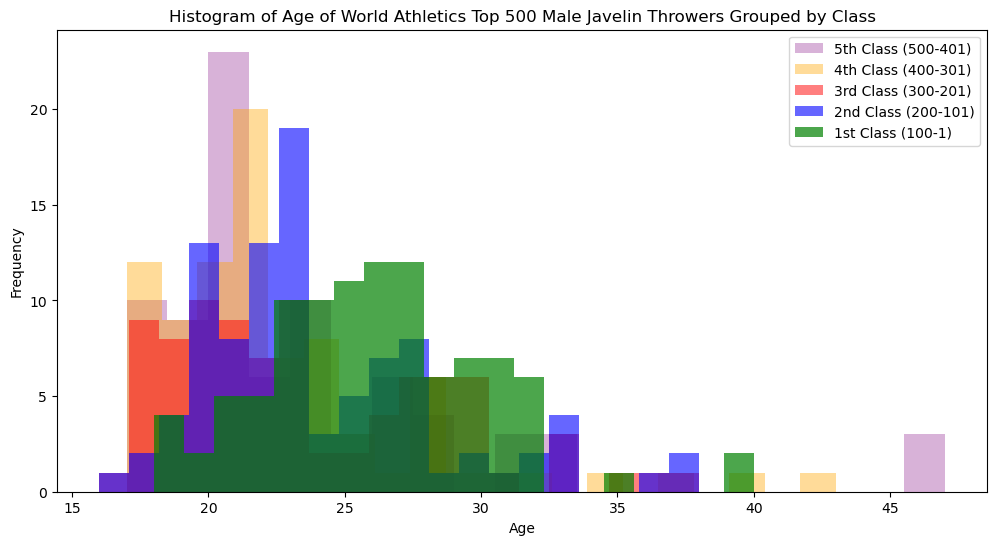

In [22]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the histograms with customizations
plt.hist(data5, bins=20, alpha=0.3, label='5th Class (500-401)', color='purple')
plt.hist(data4, bins=20, alpha=0.4, label='4th Class (400-301)', color='orange')
plt.hist(data3, bins=20, alpha=0.5, label='3rd Class (300-201)', color='red')
plt.hist(data2, bins=20, alpha=0.6, label='2nd Class (200-101)', color='blue')
plt.hist(data1, bins=20, alpha=0.7, label='1st Class (100-1)', color='green')

# Add labels and a legend
plt.title("Histogram of Age of World Athletics Top 500 Male Javelin Throwers Grouped by Class")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# Save the plot
plt.savefig("Histogram_Men_Javelin.png")

# Show the plot
plt.show()

In [23]:
# Use pingouin to perform pairwise ttests 
pairwise = pg.pairwise_gameshowell(data=df, dv='Age', between='Thrower Class').sort_values(['pval'], ascending = True).set_index('A')
pairwise

,B,mean(A),mean(B),diff,se,T,df,pval,hedges
A,,,,,,,,,
1st Class,4th Class,26.090000,22.658824,3.431176,0.665023,5.159487,164.375297,0.000007,0.769008
1st Class,5th Class,26.090000,23.237500,2.852500,0.785724,3.630410,133.045409,0.003637,0.565388
1st Class,3rd Class,26.090000,23.712644,2.377356,0.664813,3.575977,167.413658,0.004118,0.529006
1st Class,2nd Class,26.090000,23.989583,2.100417,0.603210,3.482065,191.540206,0.005511,0.496352
2nd Class,4th Class,23.989583,22.658824,1.330760,0.689912,1.928884,170.259199,0.306093,0.287912
3rd Class,4th Class,23.712644,22.658824,1.053820,0.744374,1.415714,169.974414,0.618421,0.214927
2nd Class,5th Class,23.989583,23.237500,0.752083,0.806898,0.932067,141.047325,0.883991,0.144522
4th Class,5th Class,22.658824,23.237500,-0.578676,0.854095,-0.677532,151.859924,0.961015,-0.105733
3rd Class,5th Class,23.712644,23.237500,0.475144,0.853932,0.556419,152.749386,0.980995,0.086526


In [24]:
significant = pairwise[pairwise.pval <= .05]
significant

,B,mean(A),mean(B),diff,se,T,df,pval,hedges
A,,,,,,,,,
1st Class,4th Class,26.09,22.658824,3.431176,0.665023,5.159487,164.375297,0.000007,0.769008
1st Class,5th Class,26.09,23.237500,2.852500,0.785724,3.630410,133.045409,0.003637,0.565388
1st Class,3rd Class,26.09,23.712644,2.377356,0.664813,3.575977,167.413658,0.004118,0.529006
1st Class,2nd Class,26.09,23.989583,2.100417,0.603210,3.482065,191.540206,0.005511,0.496352


In [25]:
significant_trimmed = significant[["B", "mean(A)", "mean(B)", "diff", "pval"]]
significant_trimmed

,B,mean(A),mean(B),diff,pval
A,,,,,
1st Class,4th Class,26.09,22.658824,3.431176,0.000007
1st Class,5th Class,26.09,23.237500,2.852500,0.003637
1st Class,3rd Class,26.09,23.712644,2.377356,0.004118
1st Class,2nd Class,26.09,23.989583,2.100417,0.005511


In [26]:
dfi.export(significant_trimmed, 'significant_pairwise_ttest_results_men_javelin.png')

## Discussion: 1st Class Male Javelin Throwers: those ranked in the top 100 by World Athletics, have an average age that is statistically significantly different than that of all other classes of javelin throwers in the top 500. Average age of 1st Class Throwers is greater in all cases; ranging from 2.1 to 3.4 years older.

### Add gender to df before exporting as csv

In [27]:
df["Gender"] = 'Male'
df.head(3)

,Place,Competitor,DOB,Nat,Score,Event List,Age,Thrower Class,Gender
0,1,Anderson PETERS,21 OCT 1997,GRN,1461,Javelin Throw,25.0,1st Class,Male
1,2,Neeraj CHOPRA,24 DEC 1997,IND,1455,Javelin Throw,25.0,1st Class,Male
2,3,Jakub VADLEJCH,10 OCT 1990,CZE,1428,Javelin Throw,32.0,1st Class,Male


In [29]:
df.to_csv('men_df.csv', index=False)